                                    # K- Kümeleme Anlamına Gelir (K- Means Clustering)

# Çok fazla sayıdaki ham veriyi gruplara ayırmk için kullanılır.
# Ham veriler hakkında önceden sizin sınıflandırma yapmamanız gerekmektedir.
# Yapay zeka sizin için sınıflandırmayı yapar, ona yol göstermenize gerek yoktur, tüm işi kendi yapar. (Unsuperised learning modeller grubuna girer.)
# Unsupervised Learning modellerinden en yaygın kullanılanıdır.
# Bu işlemi yaparken centroid sistemini kullanır. (Yuvarlak Şekiller) 



# It is used to separate large amounts of raw data into groups.
# You should not classify the raw data in advance.
# Artificial intelligence does the classification for you, you do not need to guide it, it does all the work itself. (It falls into the group of Unsupervised Learning models.)
# It is the most widely used of Unsupervised Learning models.
# It uses the centroid system while doing this. (Round Shapes)





                                                     # K-Means Clustering Teori

# Ham datayı gruplamak için önce kaç adet grup kullanacağını siz algoritmaya söylemeniz lazım. K-Means kelimesindeki K => K adet centroidi ifade eder. Yani kaç tane gruba böleceğini temsil eder.                                                    


# To group the raw data, you must first tell the algorithm how many groups it will use. The K in the word K-Means => K represents the number of centroids. That is, it represents how many groups to divide it into.


# Mantığı (logic)

# 1) K adet centroid(Merkez  Nokta) seçilir. Yani kaç K'ya böleceğini biz belirleriz.
# 2) Her veriyi(noktayı) kendisine en yakın centroid grubuna dahil eder.
# 3) Her centroidin merkezini kendi grubundaki noktalara bakarak tekrar hesaplar ve centroidi yeni merkez lokasyonuna koyar.
# 4) 2. ve 3. adımı centroidler artık değiştirmeyene kadar devam ettirir.(Yani ikinci adıma tekrar döner.)
# 5) Artık centroidlerin merkezi değişmemektedir, bu durumada gruplamayı bitirir.



# 1) K number of centroids are selected. In other words, we determine how many K to divide.
# 2) Each data (point) is included in the centroid group closest to it.
# 3) Recalculates the center of each centroid by looking at the points in its group and places the centroid in the new center location.
# 4) Continues steps 2 and 3 until the centroids no longer change. (In other words, returns to step 2.)
# 5) The center of the centroids no longer changes, in which case it ends the grouping.






# Gruplandırma işlem bittiğinde yeni bir veri(nokta) geldiğinde, bu noktayı hangi gruba dail edeceğine karar verirken en yakın centroid belirlenecek o centroidin bağlı olduğu gruba ait olduğu kararlaştırılır. 

# When a new data (point) arrives after the grouping process is completed, when deciding which group to include this point, the closest centroid will be determined and it will be decided that the centroid belongs to the group it is connected to.



# K değerini belirlerken elbow(dirsek) metodu kullanılır. K değerini distortion değerleri ile birlikte grafiğe döktüğünüzde dirsek noktasınd bulunan K değeri en optimal :K değeri olarak kabul edilir.

# The elbow method is used to determine the K value. When you plot the K value together with the distortion values, the K value at the elbow point is accepted as the most optimal :K value.# The elbow method is used to determine the K value. When you plot the K value together with the distortion values, the K value at the elbow point is accepted as the most optimal :K value.




# K-Means nerelerde kullanılır?        (Where is K-Means used?)

# Toplu verinizin olduğu ve gruplama yapmak istediğiniz ancak yapmadığınız her alanda kullanabilirsiniz.


# You can use it in any area where you have aggregated data and want to group it but haven't done so yet.


                                                       # proje(project)  

# Avm yönetimi müşterilerde bulunan AVM kartları sayesinde müşterilerine ait bazı bilgileri kaydetmiştir ancak henüz herhangi bir gruplama yapmamıştır.
# Projemizde bu müşteriler için gruplama yapacağız.


# The shopping mall management has recorded some information about its customers through the shopping mall cards they have, but has not yet made any grouping.
# We will make groupings for these customers in our project.




In [4]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

df = pd.read_csv("Avm_Musterileri.csv")
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


# MinMaxScaler, scikit-learn kütüphanesinin bir parçasıdır ve veri ön işleme için kullanılan bir araçtır. Özellikle, verilerin belirli bir aralığa (genellikle [0, 1] aralığına) ölçeklenmesi gerektiğinde kullanılır. Bu, farklı özelliklerin (özellikler veya değişkenler) farklı ölçeklerde veya birimlerde olduğu durumlarda verilerin normalize edilmesine yardımcı olur.



# MinMaxScaler is part of the scikit-learn library and is a tool used for data preprocessing. It is used specifically when data needs to be scaled to a specific range (usually the range [0, 1]). This helps in normalizing data in cases where different features (attributes or variables) have different scales or units.

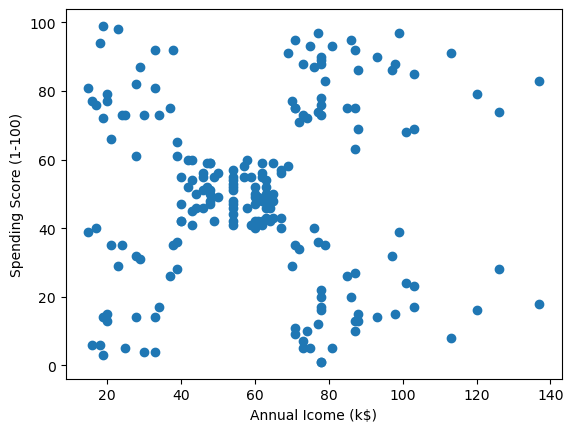

In [11]:
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])         # Annual Income: Yıllık Gelir
plt.xlabel("Annual Icome (k$)")                                             # Spending Score: Harcama Puanı
plt.ylabel("Spending Score (1-100)")
plt.show()            

In [17]:
# Bazı sütun isimleri çok uzun onları kısaltalım. (# Some column names are too long, let's shorten them.)

df.rename(columns = {"Annual Income (k$)": "income"}, inplace = True)
df.rename(columns = {"Spending Score (1-100)" : "score"}, inplace = True)    # True deyince df ismi değişir. False derseniz yeni dataframe olarak oluşturur. 

# Unutmayın modelinize verileri basmadan önce mutlaka verilerinizi normalize etmelisiniz. Geçen dersimizde normalizasyon biz kendimiz yapmıştık bu sefer sklearn kütüphanesinin MinMaxScaler() fonksiyonunu kullanacağız.



In [21]:
scaler = MinMaxScaler()
scaler.fit(df[["income"]])
df["income"] = scaler.transform(df[["income"]])

scaler.fit(df[["score"]])
df["score"] = scaler.transform(df[["score"]])

df.head()

,CustomerID,income,score
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


In [27]:
# Öne K değerini belirleyelim (Elbow Yöntemi kullanarak)

k_range = range(1,11)

list_dist = []


for k in k_range:
    kmeans_modelim = KMeans(n_clusters=k)
    kmeans_modelim.fit(df[["income", "score"]])
    list_dist.append(kmeans_modelim.inertia_)

# for k in k_range Ne Anlama Gelir?


# k_range: Bu, üzerinde döngü yapılacak olan değerlerin bulunduğu bir koleksiyondur. Bu bir liste, aralık (range), veya herhangi bir iterable (iteratif) olabilir.
# k: Döngü sırasında k_range koleksiyonundaki her bir öğeyi temsil eden değişkendir.


# What Does for k in k_range Mean?

# k_range: This is a collection of values ​​to loop over. This can be a list, range, or any iterable.
# k: The variable that represents each element in the k_range collection during the loop.

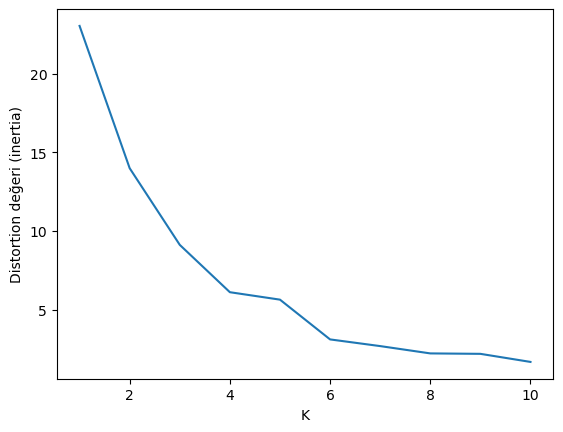

In [36]:
plt.xlabel("K")
plt.ylabel("Distortion değeri (inertia)")
plt.plot(k_range,list_dist)
plt.show()

In [40]:
# K = 5 için bir K-Means modeli oluşturalım. (En iyi k değeri 5 olduğu için)

kmeans_modelim = KMeans(n_clusters = 5)
y_predicted = kmeans_modelim.fit_predict(df[["income", "score"]])
y_predicted

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3, 3,
       1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 3, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [42]:
df["cluster"] = y_predicted    # ismini cluster veriyoruz.
df.head()

,CustomerID,income,score,cluster
0,1,0.000000,0.387755,1
1,2,0.000000,0.816327,4
2,3,0.008197,0.051020,1
3,4,0.008197,0.775510,4
4,5,0.016393,0.397959,1


In [44]:
# centroidleri görelim
kmeans_modelim.cluster_centers_

array([[0.58638083, 0.82783883],
       [0.08792846, 0.19619666],
       [0.59631148, 0.16921769],
       [0.32695811, 0.49533888],
       [0.08792846, 0.79962894]])

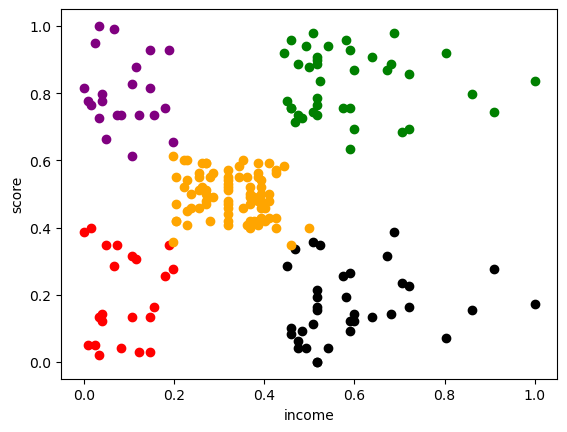

In [48]:
# grafik halinide görelim.

df1 = df[df.cluster ==0]       # df.cluster  = pandasın filtreleme özelliği kodu
df2 = df[df.cluster ==1]
df3 = df[df.cluster ==2]
df4 = df[df.cluster ==3]
df5 = df[df.cluster ==4]

plt.xlabel("income")
plt.ylabel("score")
plt.scatter(df1["income"],df1["score"],color="green")
plt.scatter(df2["income"],df2["score"],color="red")
plt.scatter(df3["income"],df3["score"],color="black")
plt.scatter(df4["income"],df4["score"],color="orange")
plt.scatter(df5["income"],df5["score"],color="purple")

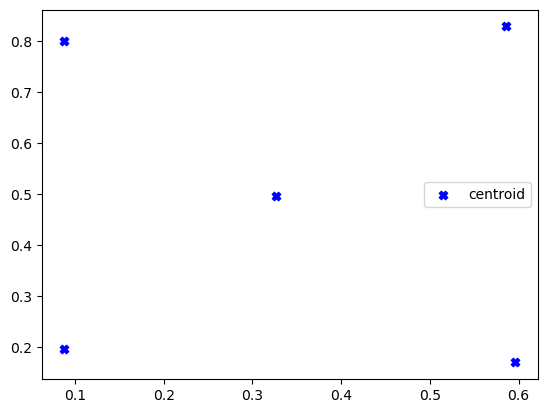

In [52]:
# kmeans_modelim.cluster.centers_ numpy 2 boyutlu array olduğu için x vey sütunlarını kmeans_modelim.cluster_centers_[:,0]
# ve kmeans_modelim.cluster_centers_[:,1] şekinde scatter plot için alıyoruz.


# Since kmeans_modelim.cluster.centers_ is a numpy 2-dimensional array, we take the x and y columns as kmeans_modelim.cluster_centers_[:,0]
# and kmeans_modelim.cluster_centers_[:,1] for the scatter plot.

plt.scatter(kmeans_modelim.cluster_centers_[:,0], kmeans_modelim.cluster_centers_[:,1], color='blue', marker='X', label='centroid')
plt.legend()
plt.show()